# Train YOLOv8 on a Custom Dataset using CLI

## 🛠️ Supported Hardware

This notebook can run in a CPU or in a GPU.

✅ AMD Instinct™ Accelerators  
✅ AMD Radeon™ RX/PRO Graphics Cards  
✅ AMD EPYC™ Processors  
✅ AMD Ryzen™ (AI) Processors  

Suggested hardware: **AI PC powered by AMD Ryzen™ AI Processors**

## ⚡ Recommended Software Environment

::::{tab-set}

:::{tab-item} Linux
- [Install Docker container](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::

:::{tab-item} Windows
- [Install Direct-ML](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu-windows.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::
::::


## 🎯 Goals

- Train a YOLOv8 model using a custom dataset with the Ultralytics CLI.
- Perform inference on the trained model.

## 💡 Problem Statement

Let us train the YOLOv8 model on a custom dataset, specifically the Aicook dataset to detect 30 common foods, such as apple, beef, bread, milk, spinach, and tomatoes in an open refrigerator effectively.

```{seealso}

**[Ultralytics YOLOv8 Documentation](https://docs.ultralytics.com/)**

**[Roboflow Aicook Dataset](https://universe.roboflow.com/karel-cornelis-q2qqg/aicook-lcv4d/dataset/4)**

**[YOLOv8 Paper](https://arxiv.org/abs/2207.02696)**
```

## Set up the environment
Install the necessary libraries and set up the Ultralytics package.

In [ ]:
!pip install ultralytics

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

Ultralytics YOLOv8.2.89  Python-3.12.4 torch-2.4.1+cpu CPU (AMD Ryzen 9 7940HS w/ Radeon 780M Graphics)
Setup complete  (16 CPUs, 29.8 GB RAM, 103.4/943.7 GB disk)


### CLI Basics 

If you want to train, validate or run inference on models and do not need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### Inference with Pre-trained COCO Model

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

CLI arguments to use YOLO to perform object detection on an image

- 'task=detect' specifies the detection task
- 'mode=predict' means we are using the model in prediction mode
- 'model=yolov8n.pt' specifies the YOLOv8 nano model to use
- 'conf=0.25' sets the confidence threshold for detections (only detections above 25% confidence will be shown)
- 'source=' specifies the image URL to run detection on
- 'save=True' will save the output image with detected objects

In [ ]:
# Change the current directory to the 'datasets' folder
%cd datasets

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

[WinError 2] The system cannot find the file specified: 'datasets'
aup-ai-tutorials\train


This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.


Ultralytics YOLOv8.2.89 ðŸš€ Python-3.12.4 torch-2.4.1+cpu CPU (AMD Ryzen 9 7940HS w/ Radeon 780M Graphics)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 aup-ai-tutorials\train\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 61.1ms
Speed: 0.0ms preprocess, 61.1ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\predict2
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


### Prediction test

Show the prediction, as you can see the output is the image with the bounding boxes around the detected objects.

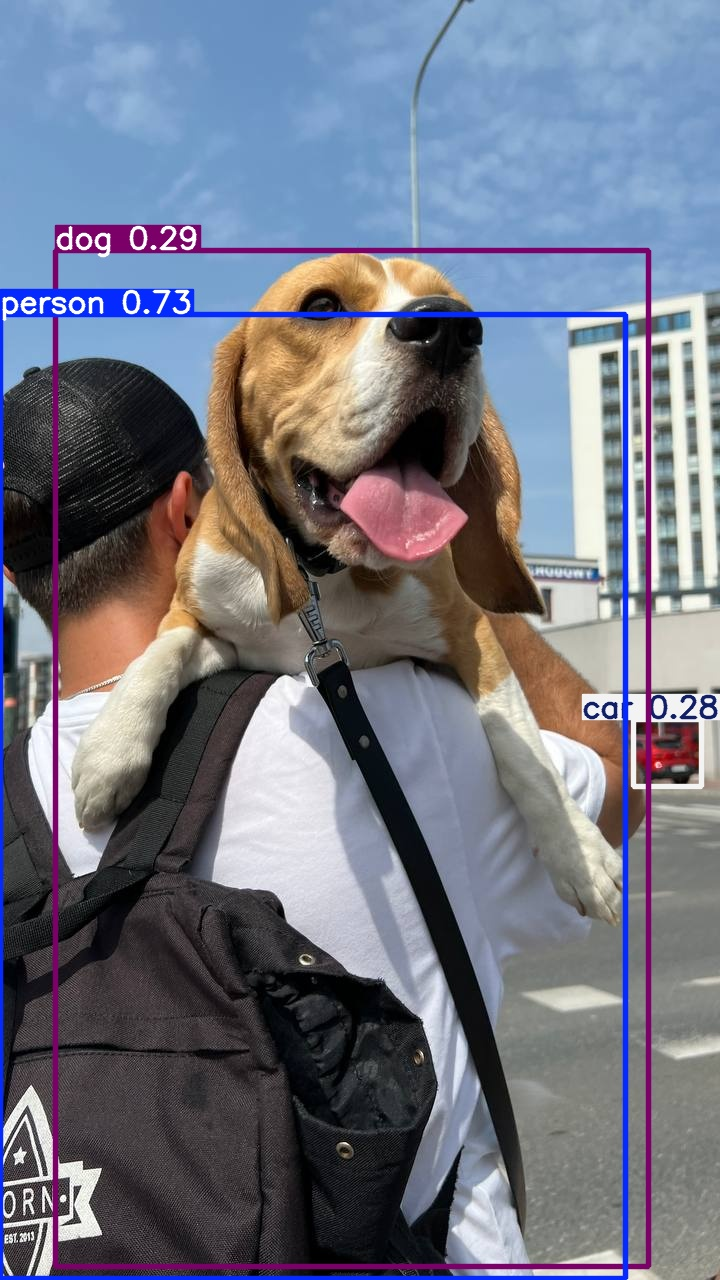

In [3]:
Image(filename='./runs/detect/predict/dog.jpeg', width=200, height=200)

## Download and prepare the dataset 

Obtain the Aicook dataset from Roboflow.
The Aicook open-source dataset from Roboflow contains images of day-to-day items in an open refrigerator.
The classes consist of 30 common foods, such as apple, beef, bread, milk, spinach, and tomatoes. The dataset has 3,050 images in total. The original set of images of the open refrigerator had 516 images and was augmented to 3,050 images through rotation, exposure, blur, salt and pepper noise and cut-outs. The source [train:validation:test] set was split into a ratio of [2896:103:51].

```{note}
You will need an account in [Roboflow](https://roboflow.com/) to get the API Key in order to download the dataset.

See how to get the API Key here: https://docs.roboflow.com/api-reference/authentication
```

1. Setup your Roboflow API Key
2. Access the specific workspace and project within Roboflow
   - 'workspace("karel-cornelis-q2qqg")' specifies the workspace name
   - 'project("aicook-lcv4d")' specifies the project within that workspace
3. Download version 4 of the dataset in YOLOv8 format
   - 'version(4)' specifies the dataset version
   - 'download("yolov8")' downloads the dataset formatted for YOLOv8

In [ ]:
rf = Roboflow(api_key="qoKTkrhpZFwIA3ZUQ1Hb")

project = rf.workspace("karel-cornelis-q2qqg").project("aicook-lcv4d")

dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.89, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to aicook-4 in yolov8:: 100%|██████████████████████| 6112/6112 [00:08<00:00, 701.10it/s]


Show the 30 classes of the dataset

In [ ]:
%pycat {dataset.location}/data.yaml

names:
- apple
- banana
- beef
- blueberries
- bread
- butter
- carrot
- cheese
- chicken
- chicken_breast
- chocolate
- corn
- eggs
- flour
- goat_cheese
- green_beans
- ground_beef
- ham
- heavy_cream
- lime
- milk
- mushrooms
- onion
- potato
- shrimp
- spinach
- strawberries
- sugar
- sweet_potato
- tomato
nc: 30
roboflow:
  license: MIT
  project: aicook-lcv4d
  url: https://universe.roboflow.com/karel-cornelis-q2qqg/aicook-lcv4d/dataset/4
  version: 4
  workspace: karel-cornelis-q2qqg
test: ../test/images
train: C:/Users/npurusho/Desktop/aupai/aup-ai-tutorials-main/train/aicook-4/train/images
val: C:/Users/npurusho/Desktop/aupai/aup-ai-tutorials-main/train/aicook-4/valid/images


## Training using the Ultralytics CLI

Train the YOLOv8 model on a custom dataset using the YOLO CLI command
- 'task=detect' specifies that the task is object detection
- 'mode=train' puts the model in training mode
- 'model=yolov8s.pt' specifies the YOLOv8 small model architecture (pre-trained weights) to start training from
- 'data={dataset.location}/data.yaml' sets the path to the dataset configuration file in YAML format
  (this file contains paths to images, labels, and class definitions)
- 'epochs=3' defines the number of training epochs (full passes through the dataset) to be 3
- 'imgsz=800' sets the input image size to 800 pixels, adjusting the model input resolution
- 'plots=True' enables plot generation to visualize training progress
- 'device=cpu' forces training to occur on the CPU (useful if no GPU is available)

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=3 imgsz=800 plots=True device=cpu

New https://pypi.org/project/ultralytics/8.3.27 available ðŸ˜ƒ Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 ðŸš€ Python-3.12.4 torch-2.4.1+cpu CPU (AMD Ryzen 9 7940HS w/ Radeon 780M Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=aup-ai-tutorials\train\aicook-4/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=


train: Scanning aup-ai-tutorials\train\aicook-4\train\labels...:   0%|          | 0/2896 [00:00<?, ?it/s]
train: Scanning aup-ai-tutorials\train\aicook-4\train\labels... 203 images, 0 backgrounds, 0 corrupt:   7%|7         | 203/2896 [00:00<00:01, 2014.45it/s]
train: Scanning aup-ai-tutorials\train\aicook-4\train\labels... 413 images, 0 backgrounds, 0 corrupt:  14%|#4        | 413/2896 [00:00<00:01, 2058.00it/s]
train: Scanning aup-ai-tutorials\train\aicook-4\train\labels... 619 images, 0 backgrounds, 0 corrupt:  21%|##1       | 619/2896 [00:00<00:01, 1982.81it/s]
train: Scanning aup-ai-tutorials\train\aicook-4\train\labels... 818 images, 0 backgrounds, 0 corrupt:  28%|##8       | 818/2896 [00:00<00:01, 1908.55it/s]
train: Scanning aup-ai-tutorials\train\aicook-4\train\labels... 1011 images, 0 backgrounds, 0 corrupt:  35%|###4      | 1011/2896 [00:00<00:00, 1906.50it/s]
train: Scanning aup-ai-tutorials\train\aicook-4\train\labels... 1202 images, 0 backgrounds, 0 corrupt:  42%|####1   

## Evaluate the trained model
 
Assess the performance of the trained model.

### Confusion matrix

The X-axis represents the predicted class and the Y-axis represents the actual class.

The diagonal cells show true positives, they show how many instances of each class were correctly predicted by the model. 
The off-diagonal cells show instances where the predicted class did not match the actual class.

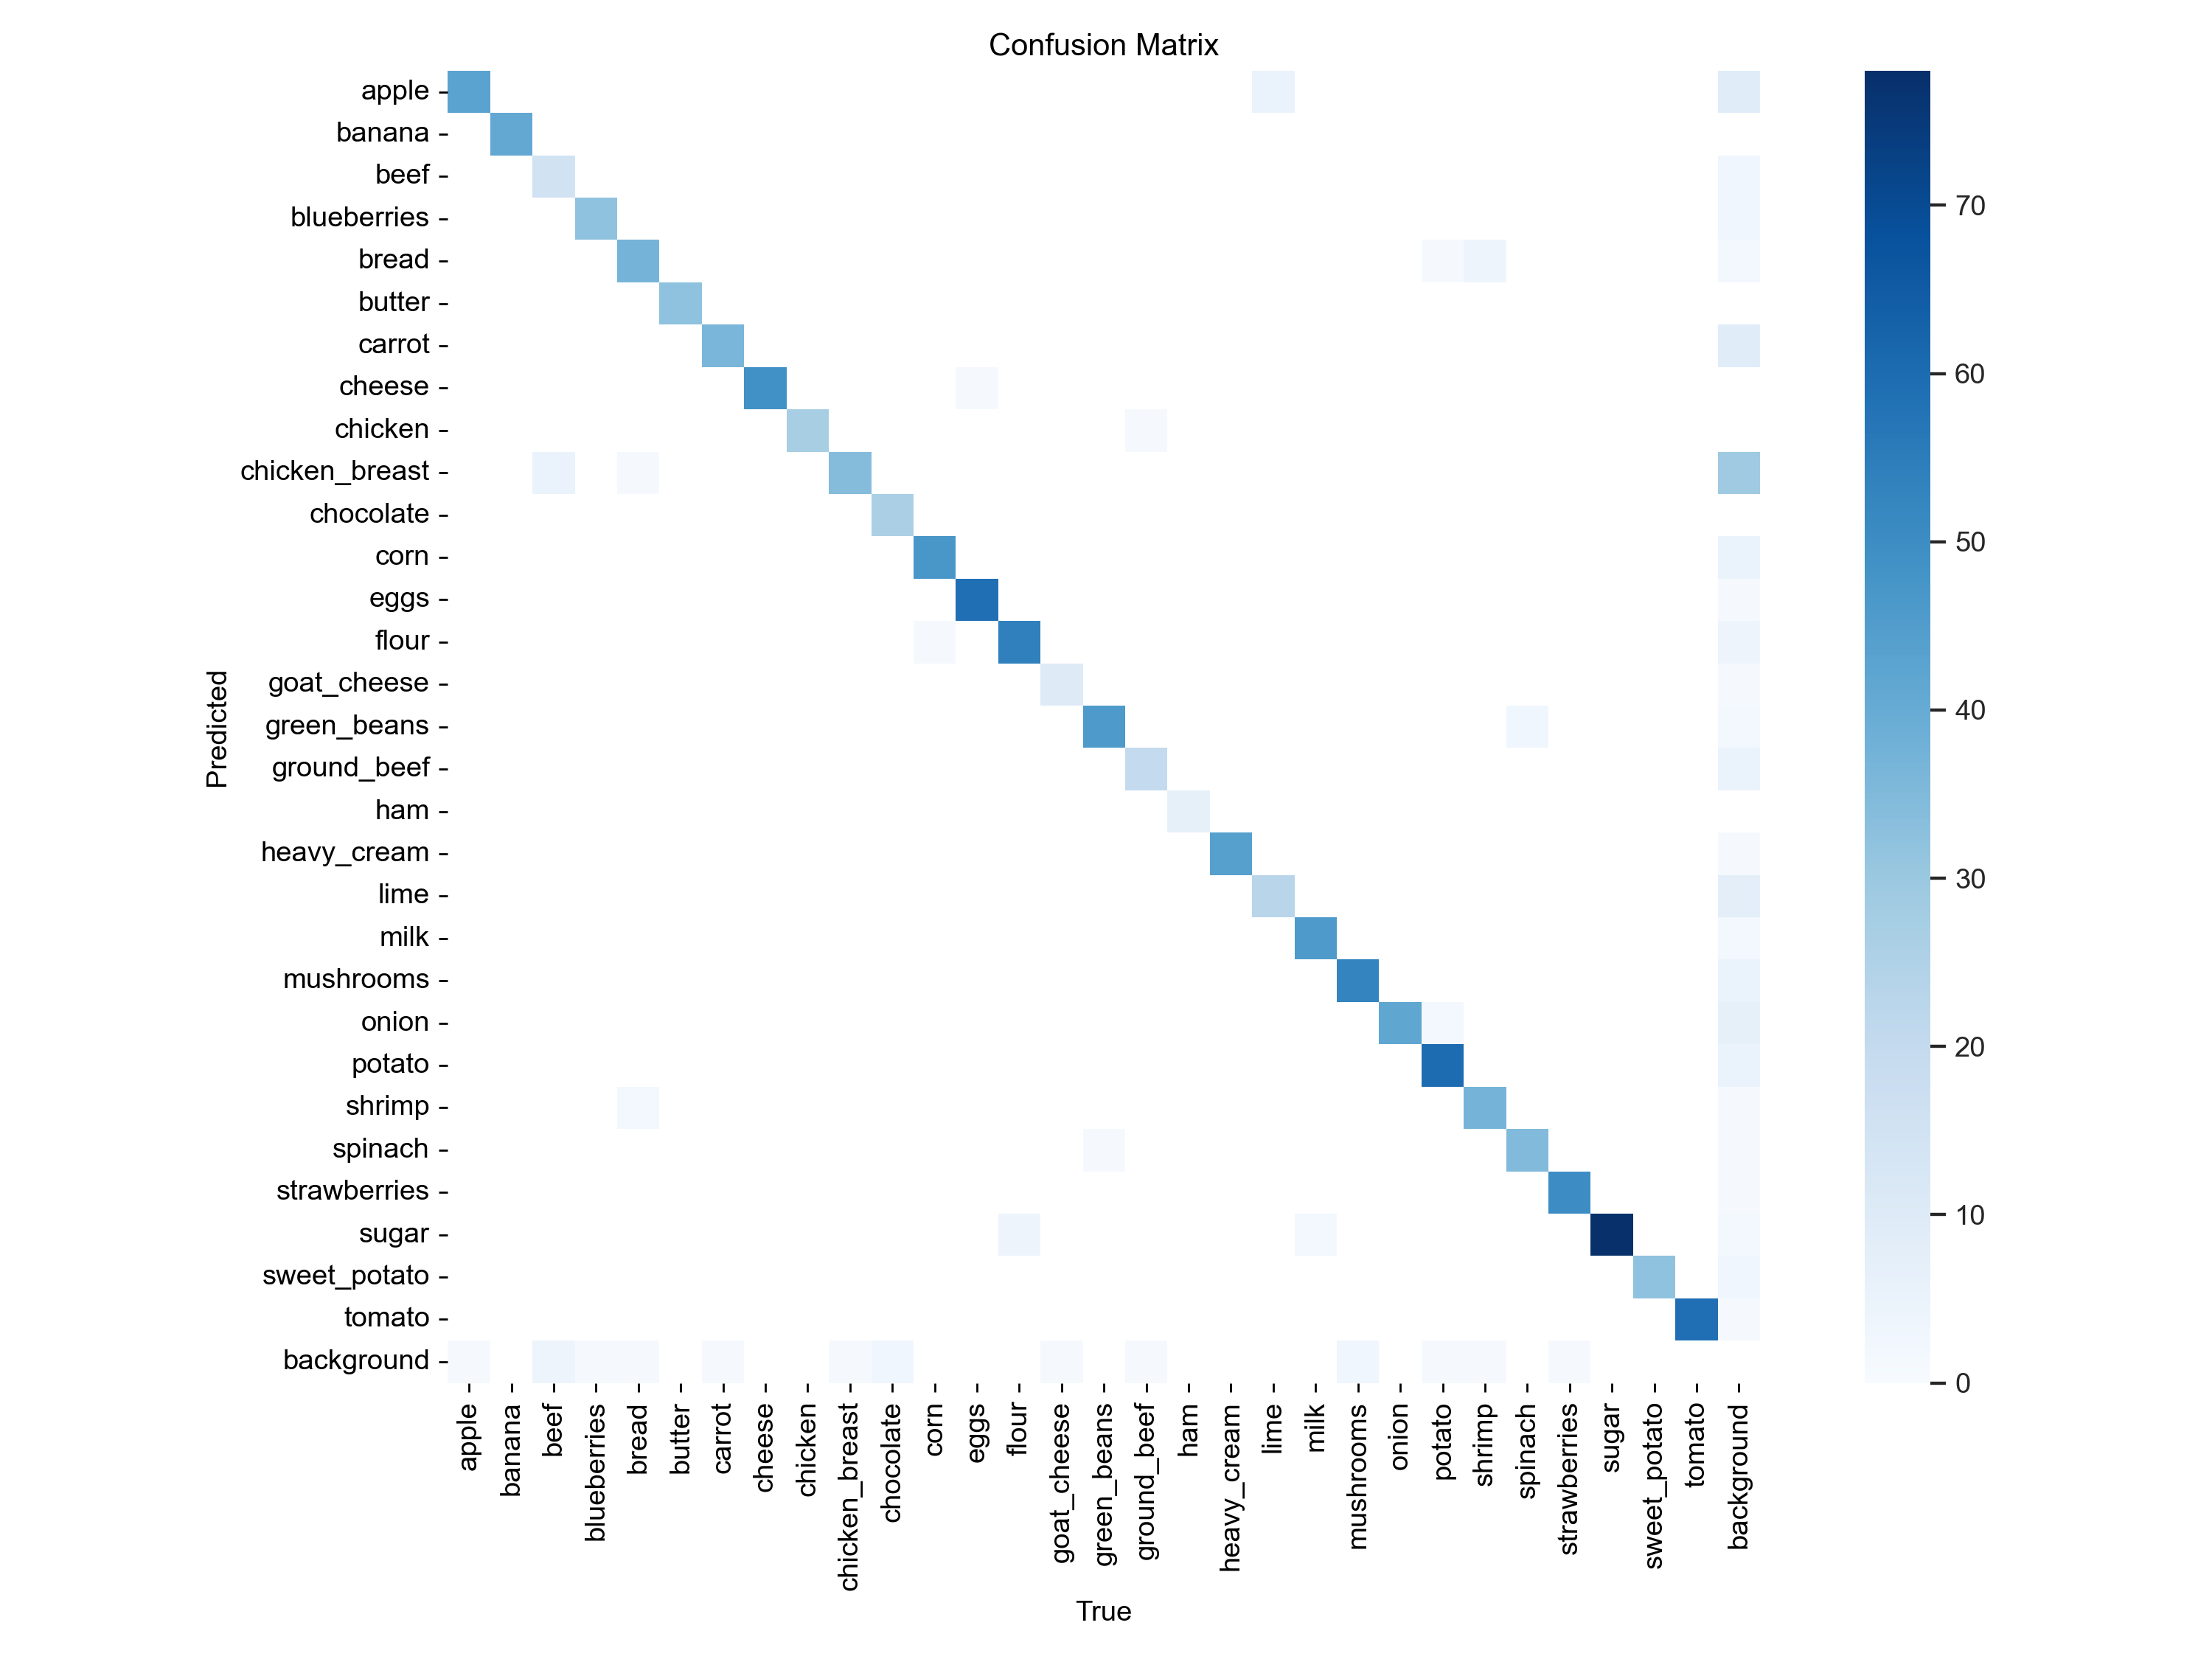

In [33]:
from IPython.display import Image
Image(filename=f'runs/detect/train7/confusion_matrix.png', width=600)

### Loss and Accuracy plots

The plot below shows the loss and accuracy plot for YOLOv8 when fine-tuned on the ai-cook data set.
The model performed well with a high precision and recall rate of 0.94 or higher. The mean-average-precision for an IoU >
0.5 (a good prediction) for YOLOv8 was 0.97.

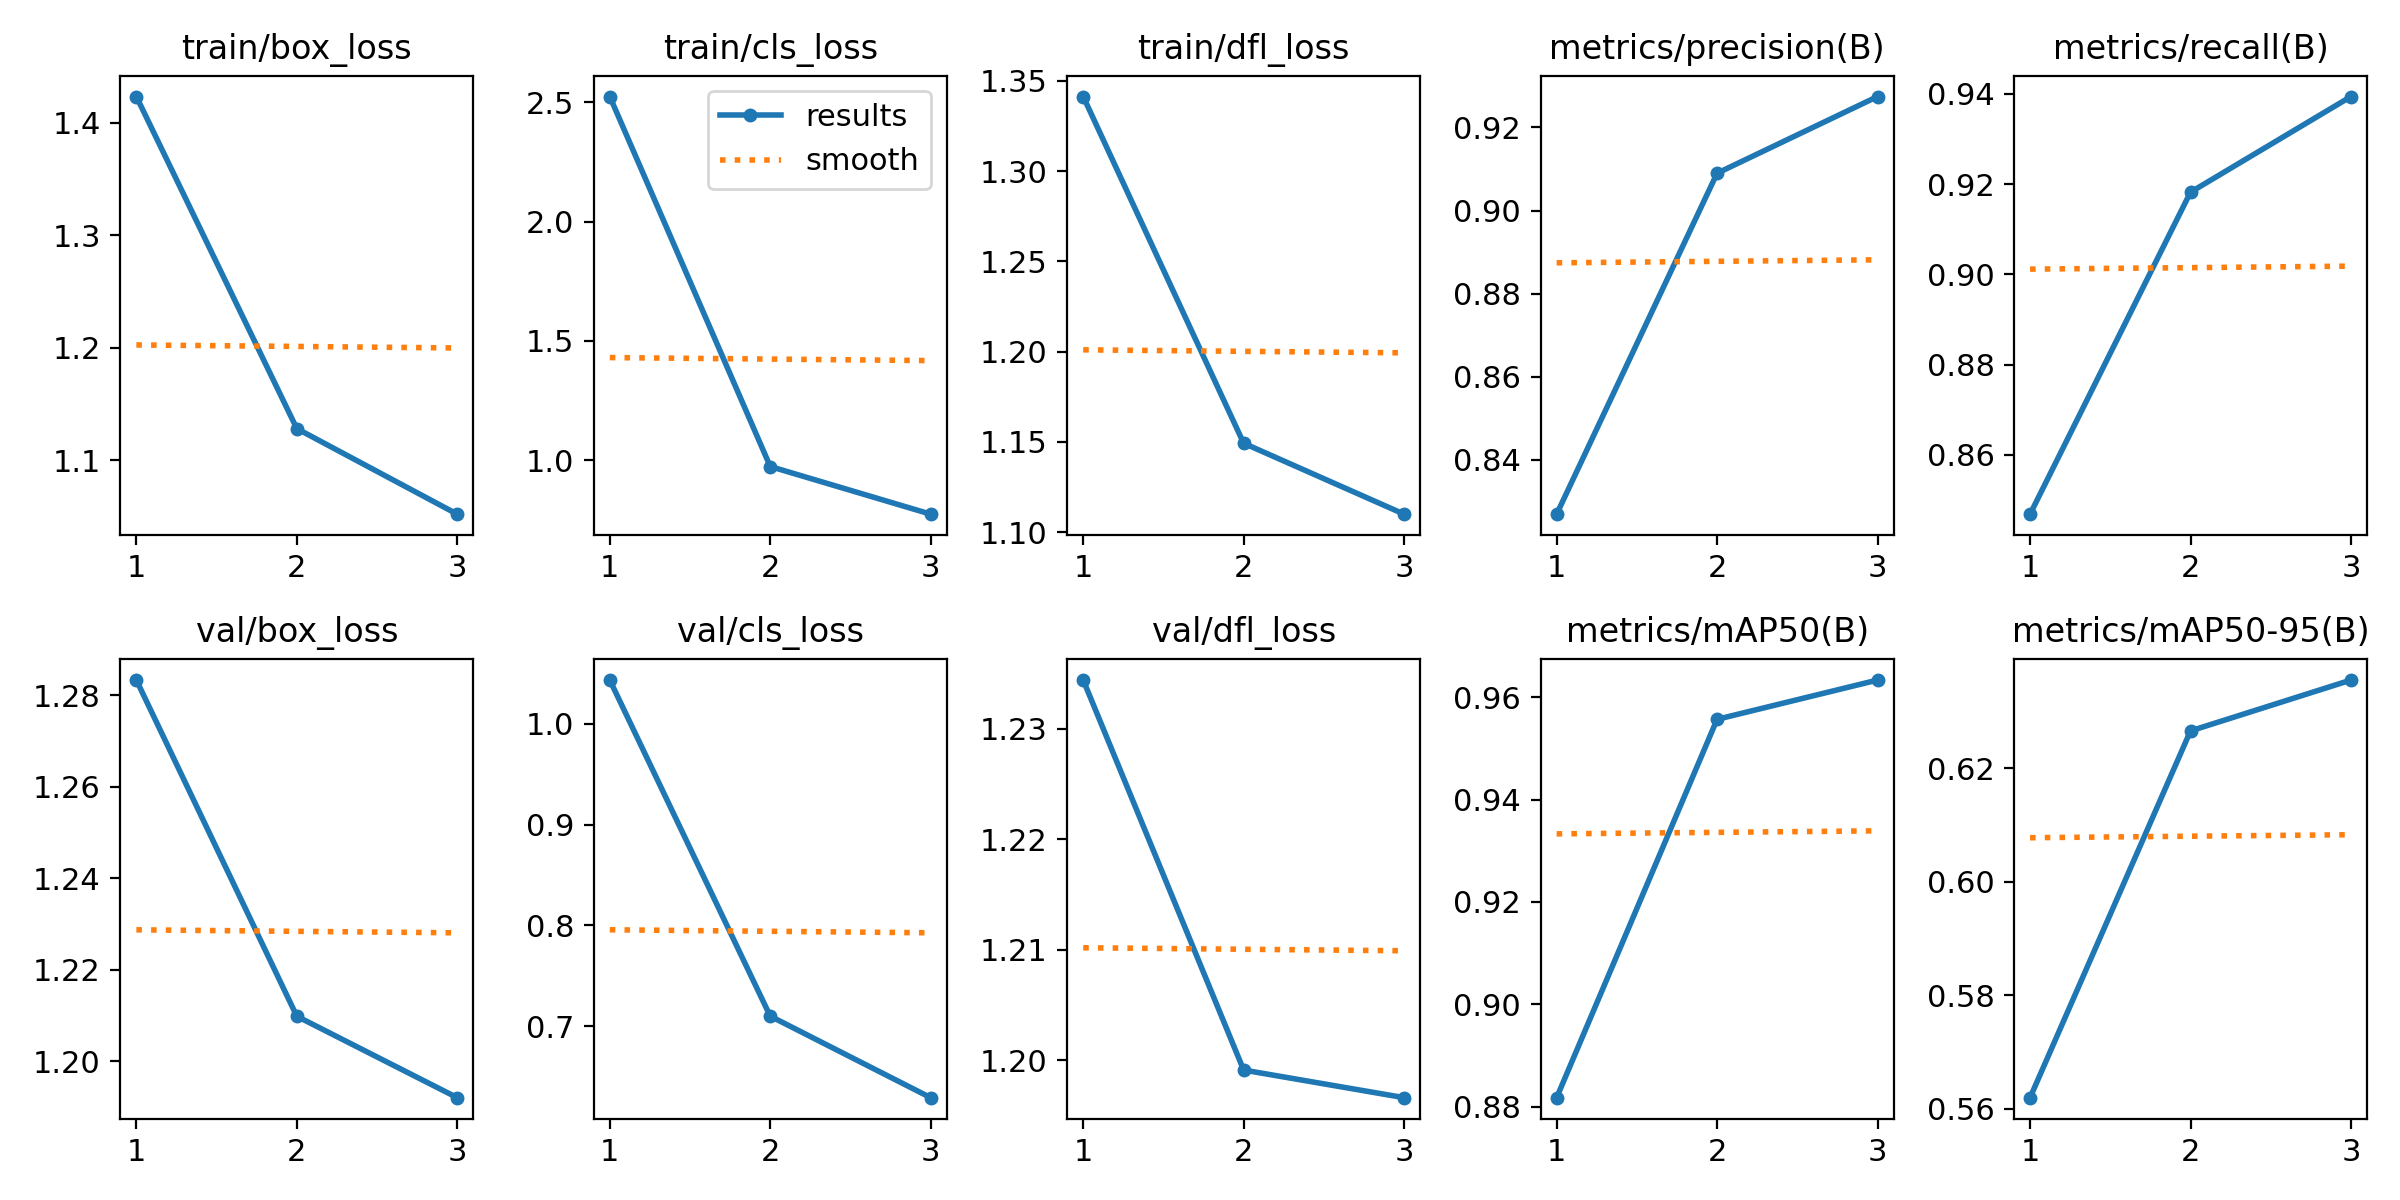

In [34]:
Image(filename=f'runs/detect/train7/results.png', width=600)

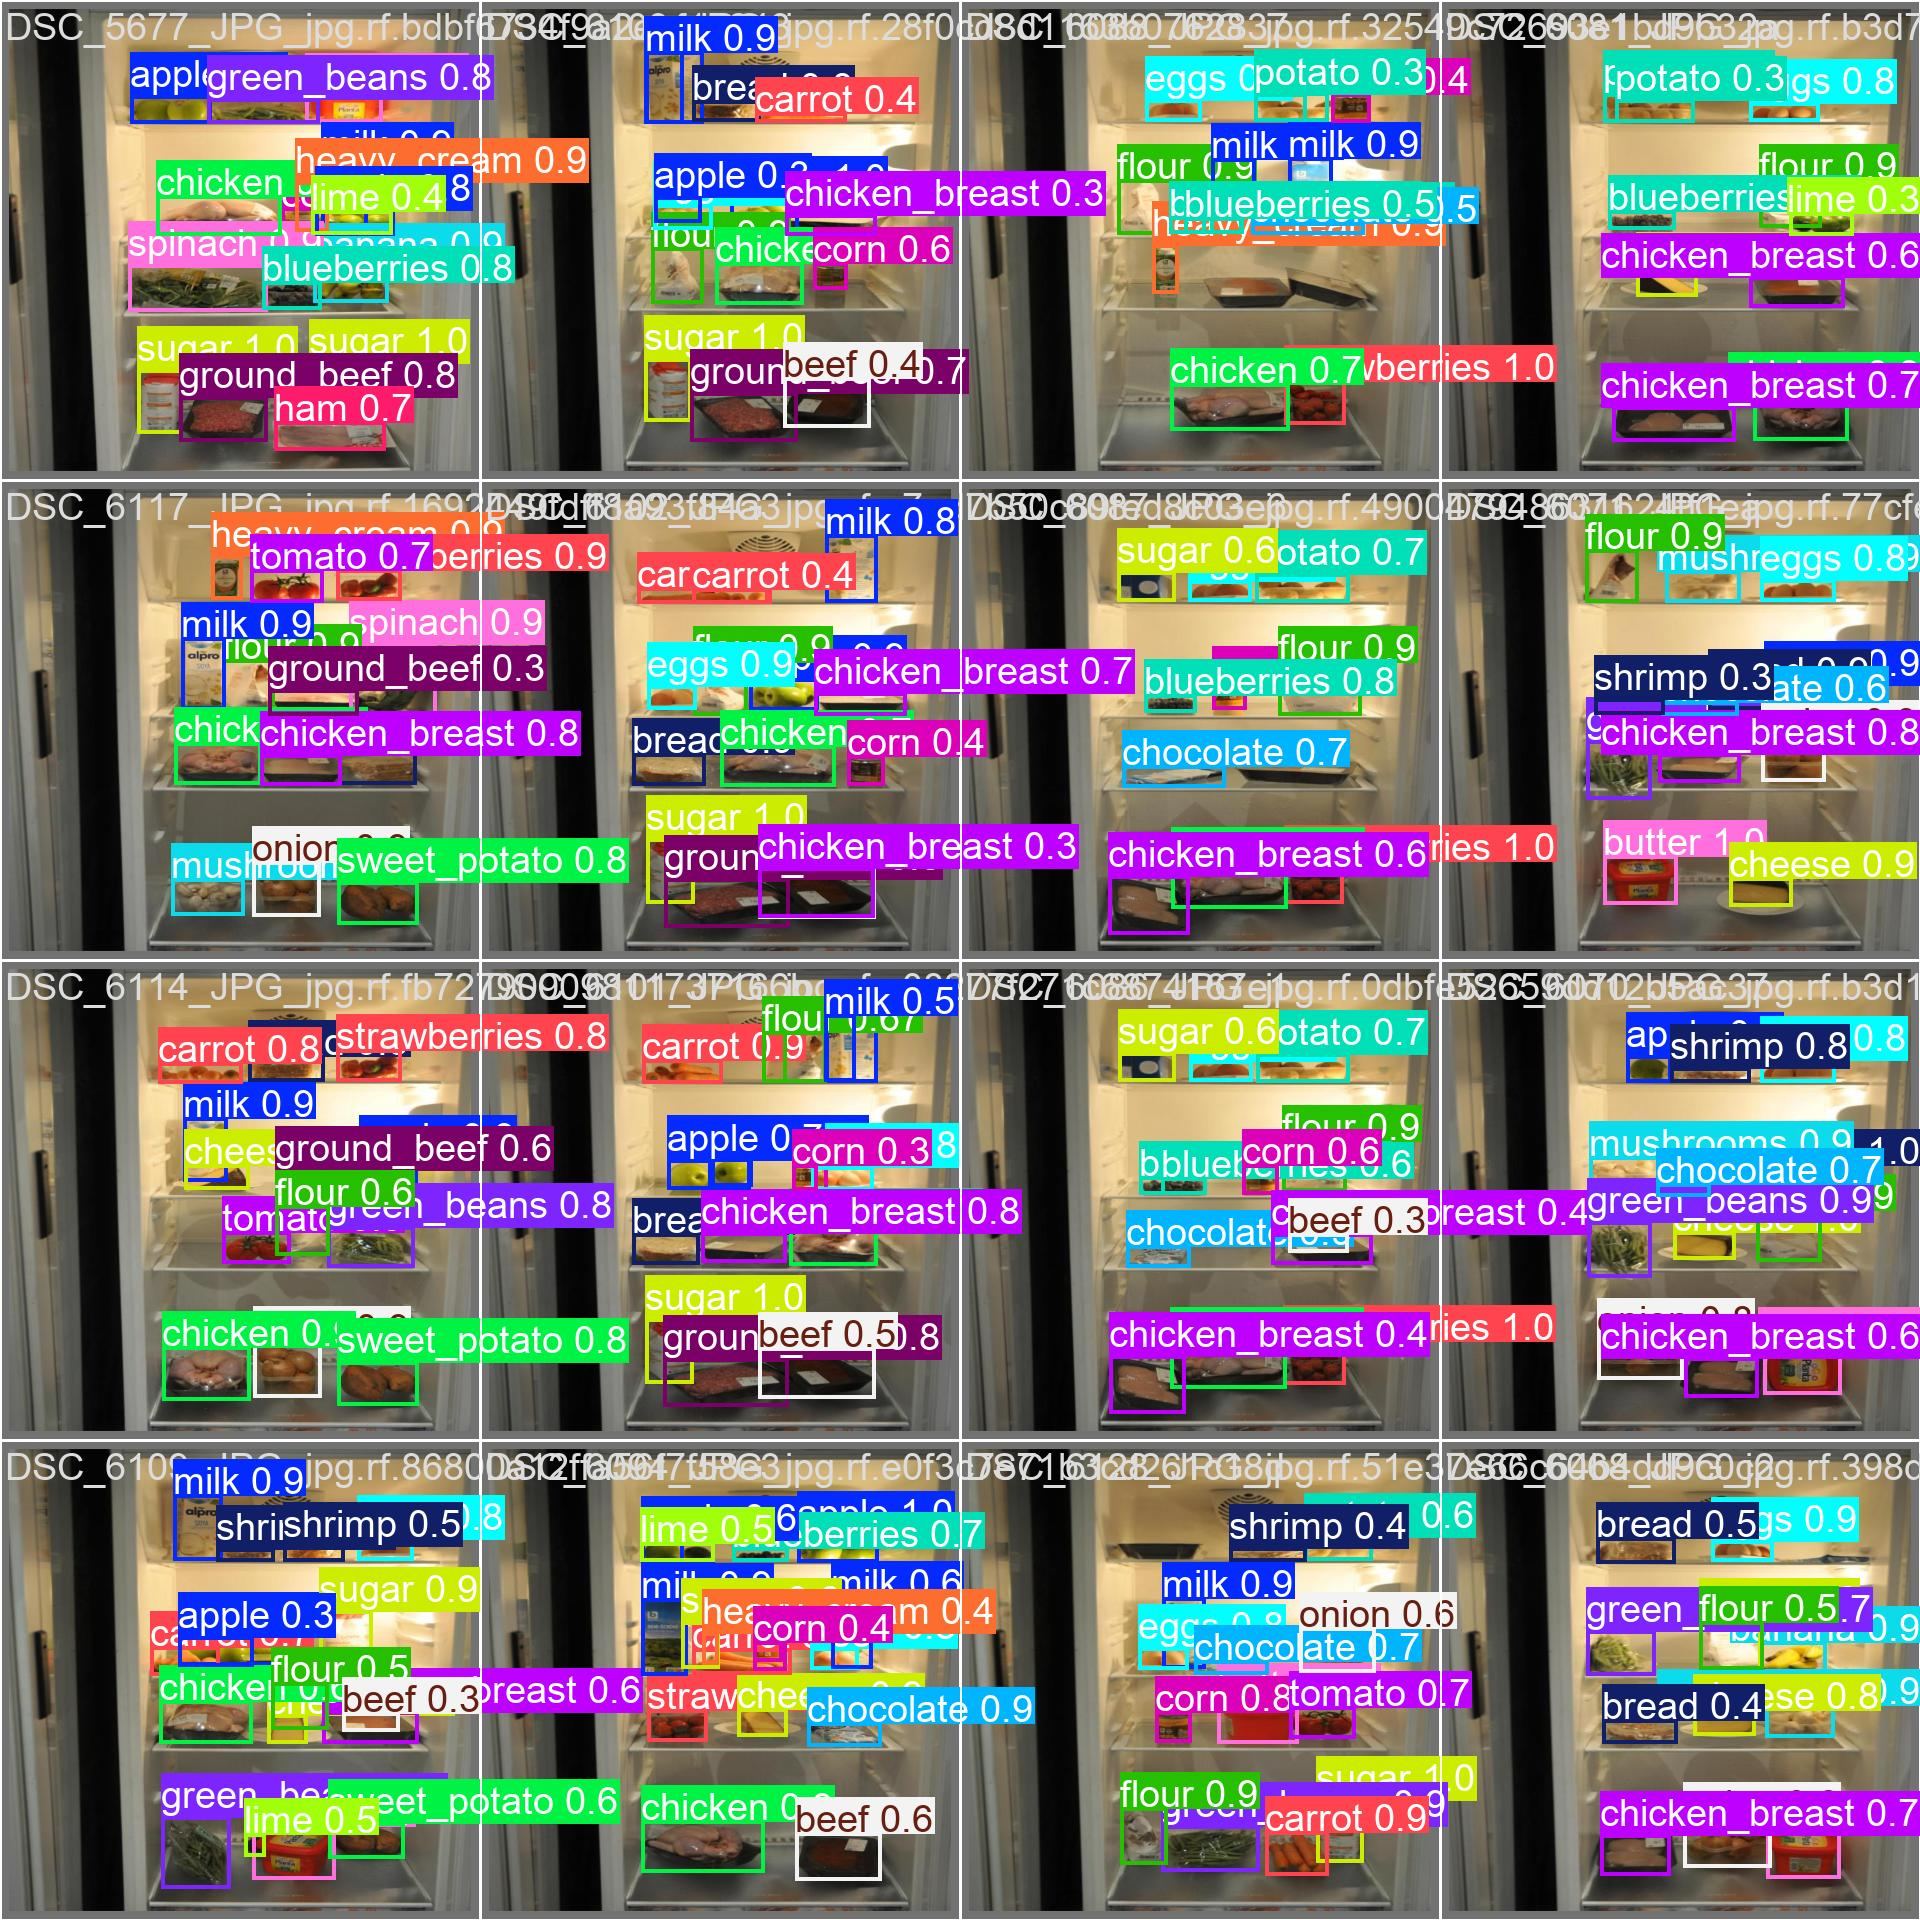

In [35]:
Image(filename=f'runs/detect/train7/val_batch0_pred.jpg', width=600)

## Validate Custom Model

Run the model on validation images and display the results.

Validate the YOLOv8 model on the validation dataset using the YOLO CLI command

- 'task=detect' specifies that the task is object detection
- 'mode=val' puts the model in validation mode, which assesses performance on a validation set
- 'model=runs/detect/train7/weights/best.pt' specifies the path to the trained model weights (the best weights from training)
- 'data={dataset.location}/data.yaml' provides the path to the dataset configuration file, which includes validation data paths

In [ ]:
!yolo task=detect mode=val model=runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.89 ðŸš€ Python-3.12.4 torch-2.4.1+cpu CPU (AMD Ryzen 9 7940HS w/ Radeon 780M Graphics)
Model summary (fused): 168 layers, 11,137,194 parameters, 0 gradients, 28.5 GFLOPs
                   all        103       1227      0.927       0.94      0.963      0.635
                 apple         43         44      0.827      0.976      0.977      0.742
                banana         41         41      0.986          1      0.995      0.744
                  beef         24         24      0.864       0.53      0.759       0.28
           blueberries         33         33      0.908       0.97      0.966      0.621
                 bread         41         41      0.904      0.951      0.966      0.654
                butter         32         32      0.983          1      0.995      0.715
                carrot         35         37      0.859      0.946      0.946       0.52
                cheese         49         49      0.984          1      0.995       0.74
        


val: Scanning aup-ai-tutorials\train\aicook-4\valid\labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100%|##########| 103/103 [00:00<?, ?it/s]
val: Scanning aup-ai-tutorials\train\aicook-4\valid\labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100%|##########| 103/103 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|#4        | 1/7 [00:02<00:14,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|##8       | 2/7 [00:04<00:12,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|####2     | 3/7 [00:07<00:09,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|#####7    | 4/7 [00:09<00:07,  2.47s/it]
                 Class     Ima

Display a batch of images

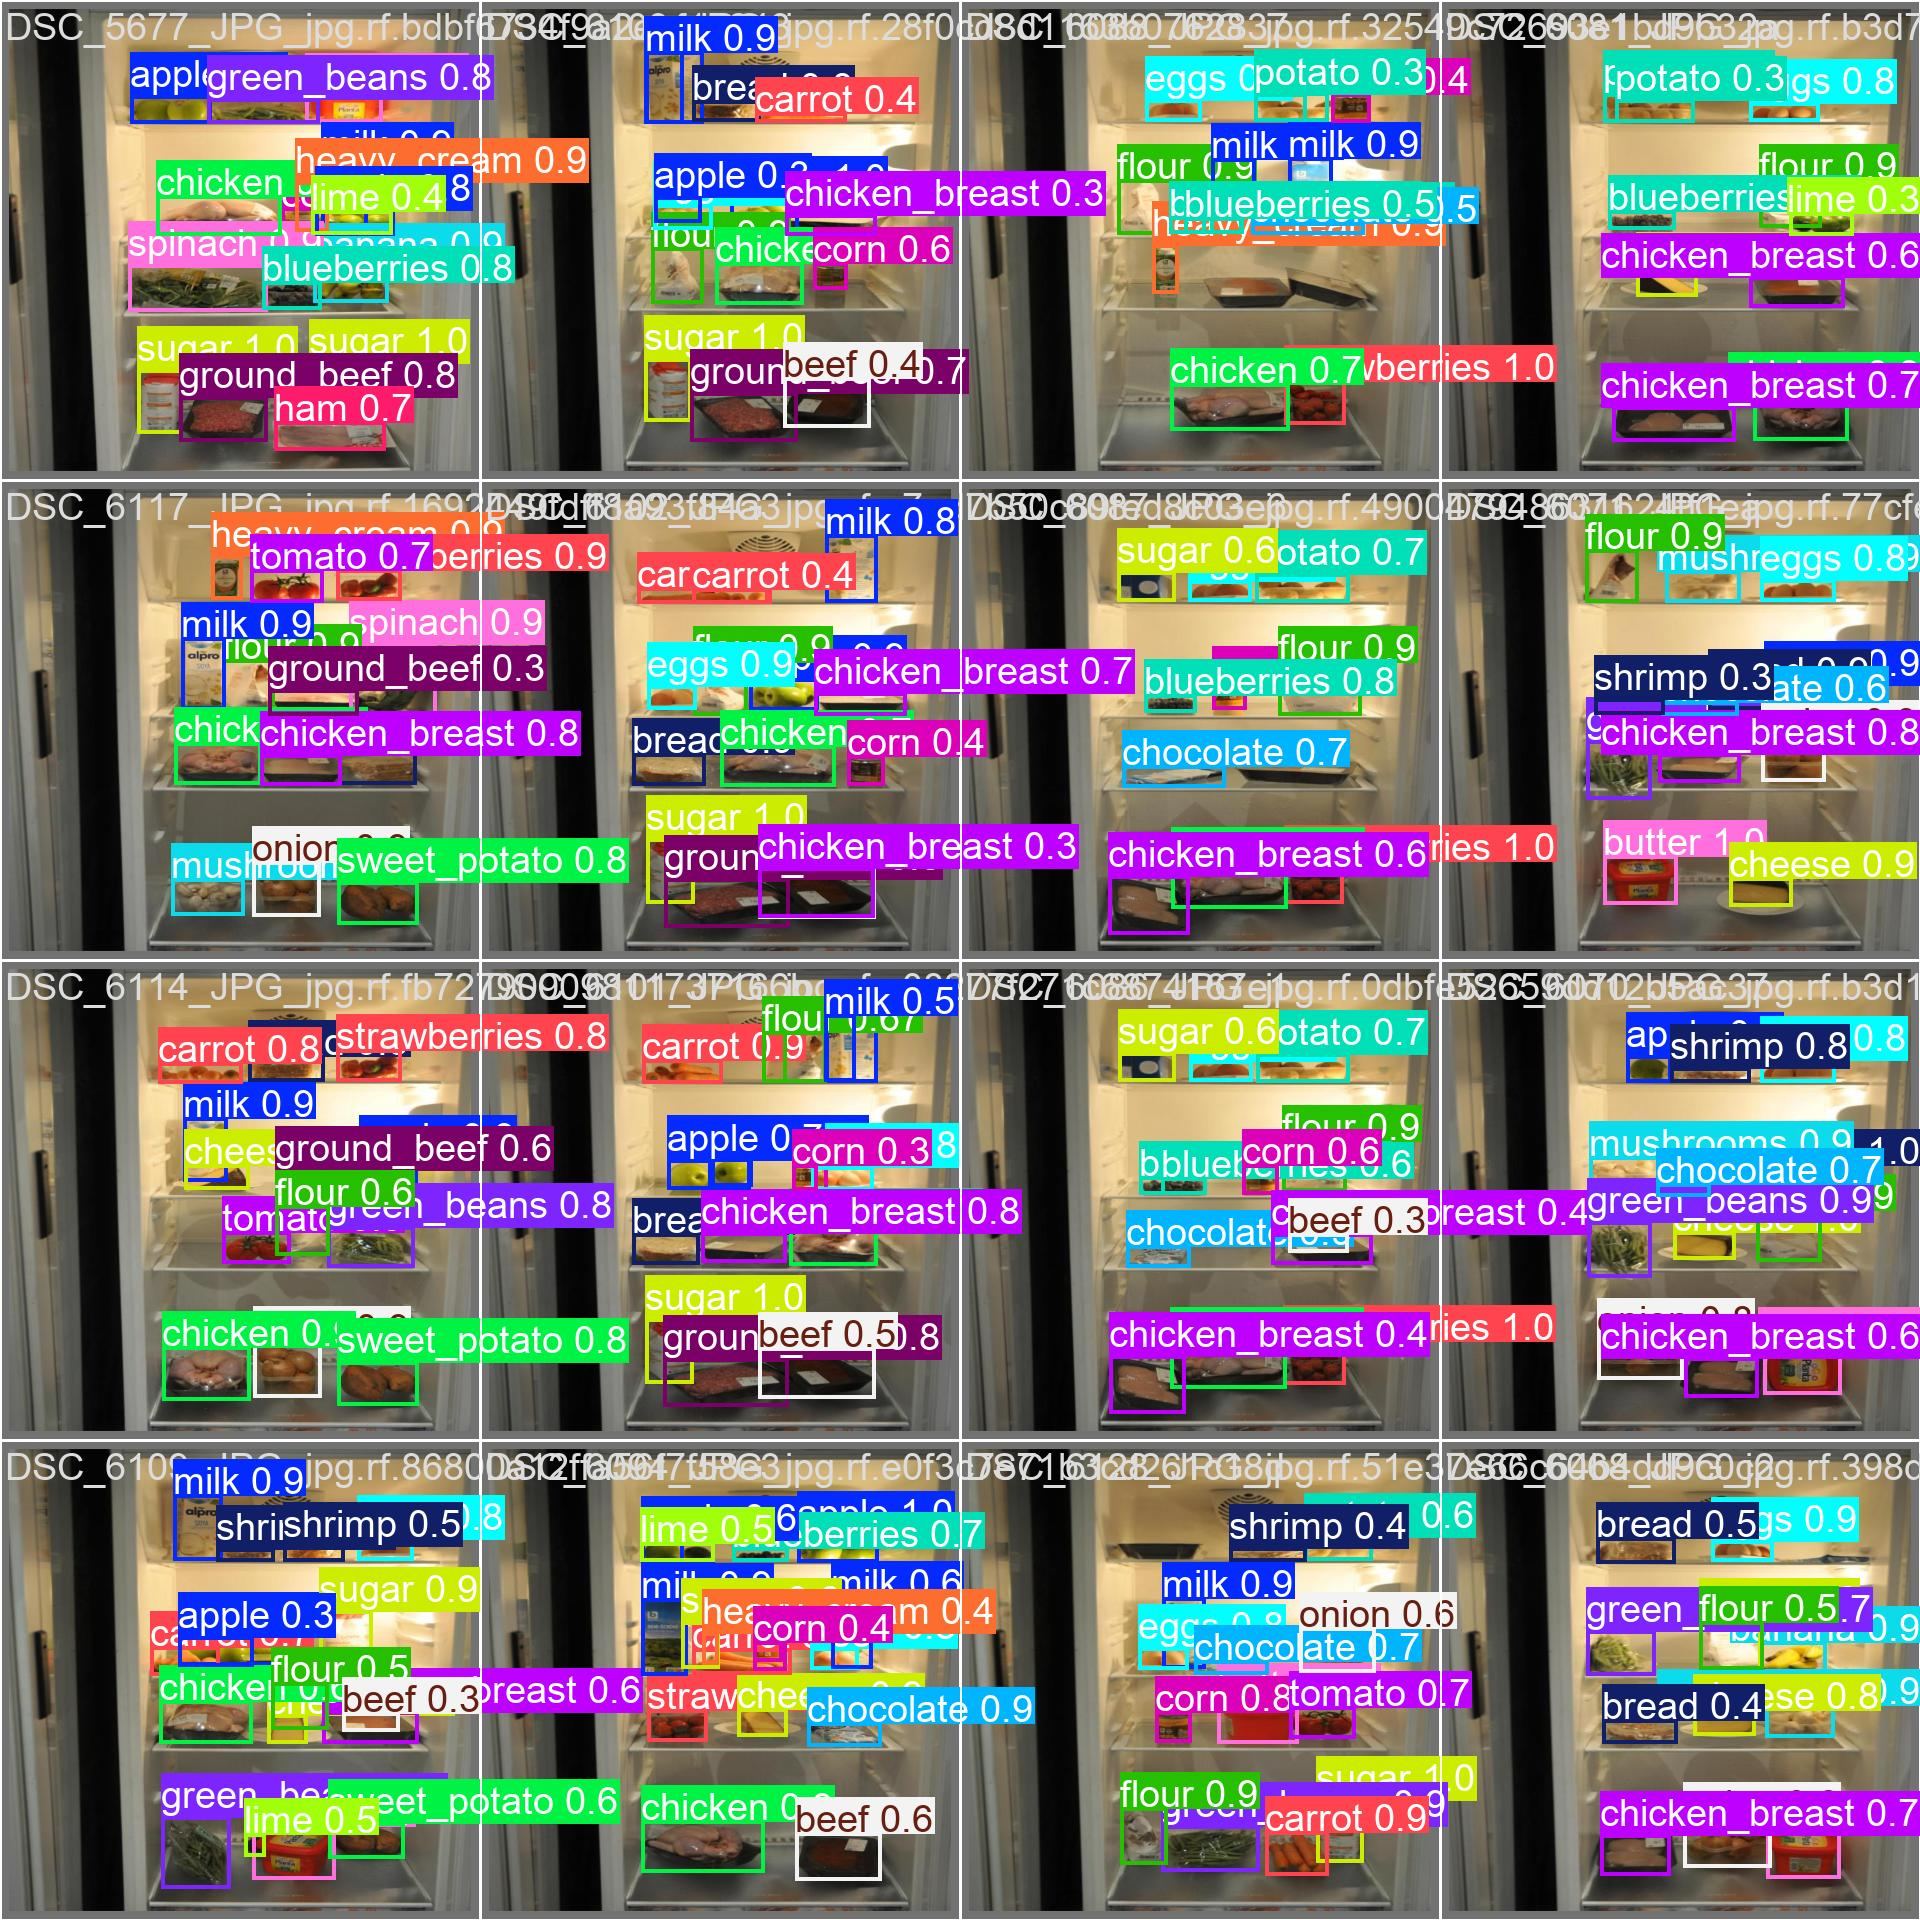

In [40]:
Image(filename=f'runs/detect/val/val_batch0_pred.jpg', width=600)

## Inference with Custom Model

Test the model on new images and display the results.

Use the YOLOv8 model to make predictions on test images with the YOLO CLI command

- 'task=detect' specifies that the task is object detection
- 'mode=predict' sets the model to prediction mode, which performs inference on input images
- 'model=./runs/detect/train7/weights/best.pt' specifies the path to the trained model weights (using the best weights from training)
- 'conf=0.25' sets the confidence threshold for detections (only predictions with a confidence score above 25% will be displayed)
- 'source={dataset.location}/test/images' defines the source directory of the test images for inference
- 'save=True' enables saving the output images with detected objects to a directory

In [ ]:
!yolo task=detect mode=predict model=./runs/detect/train7/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.89 ðŸš€ Python-3.12.4 torch-2.4.1+cpu CPU (AMD Ryzen 9 7940HS w/ Radeon 780M Graphics)
Model summary (fused): 168 layers, 11,137,194 parameters, 0 gradients, 28.5 GFLOPs

image 1/51 aup-ai-tutorials\train\aicook-4\test\images\DSC_5941_JPG_jpg.rf.7f34ef03affd2f952f6519e8506d8cdc.jpg: 800x800 1 apple, 1 bread, 1 carrot, 1 chocolate, 1 flour, 1 green_beans, 1 ground_beef, 1 lime, 1 strawberries, 2 sugars, 1 tomato, 140.8ms
image 2/51 aup-ai-tutorials\train\aicook-4\test\images\DSC_5945_JPG_jpg.rf.15457f9c7c97e17d20684976193e6e8f.jpg: 800x800 1 apple, 2 beefs, 1 bread, 1 carrot, 1 chicken, 1 chicken_breast, 1 ground_beef, 1 lime, 1 spinach, 1 strawberries, 1 sugar, 1 tomato, 117.7ms
image 3/51 aup-ai-tutorials\train\aicook-4\test\images\DSC_5959_JPG_jpg.rf.9fc416d1349e2e3c26a0a0d2a15a7976.jpg: 800x800 1 bread, 1 butter, 1 cheese, 1 eggs, 1 green_beans, 1 ground_beef, 1 heavy_cream, 1 mushrooms, 1 onion, 1 spinach, 1 strawberries, 3 sweet_potatos, 114.3ms
image 4/51 aup

### Display a few predictions

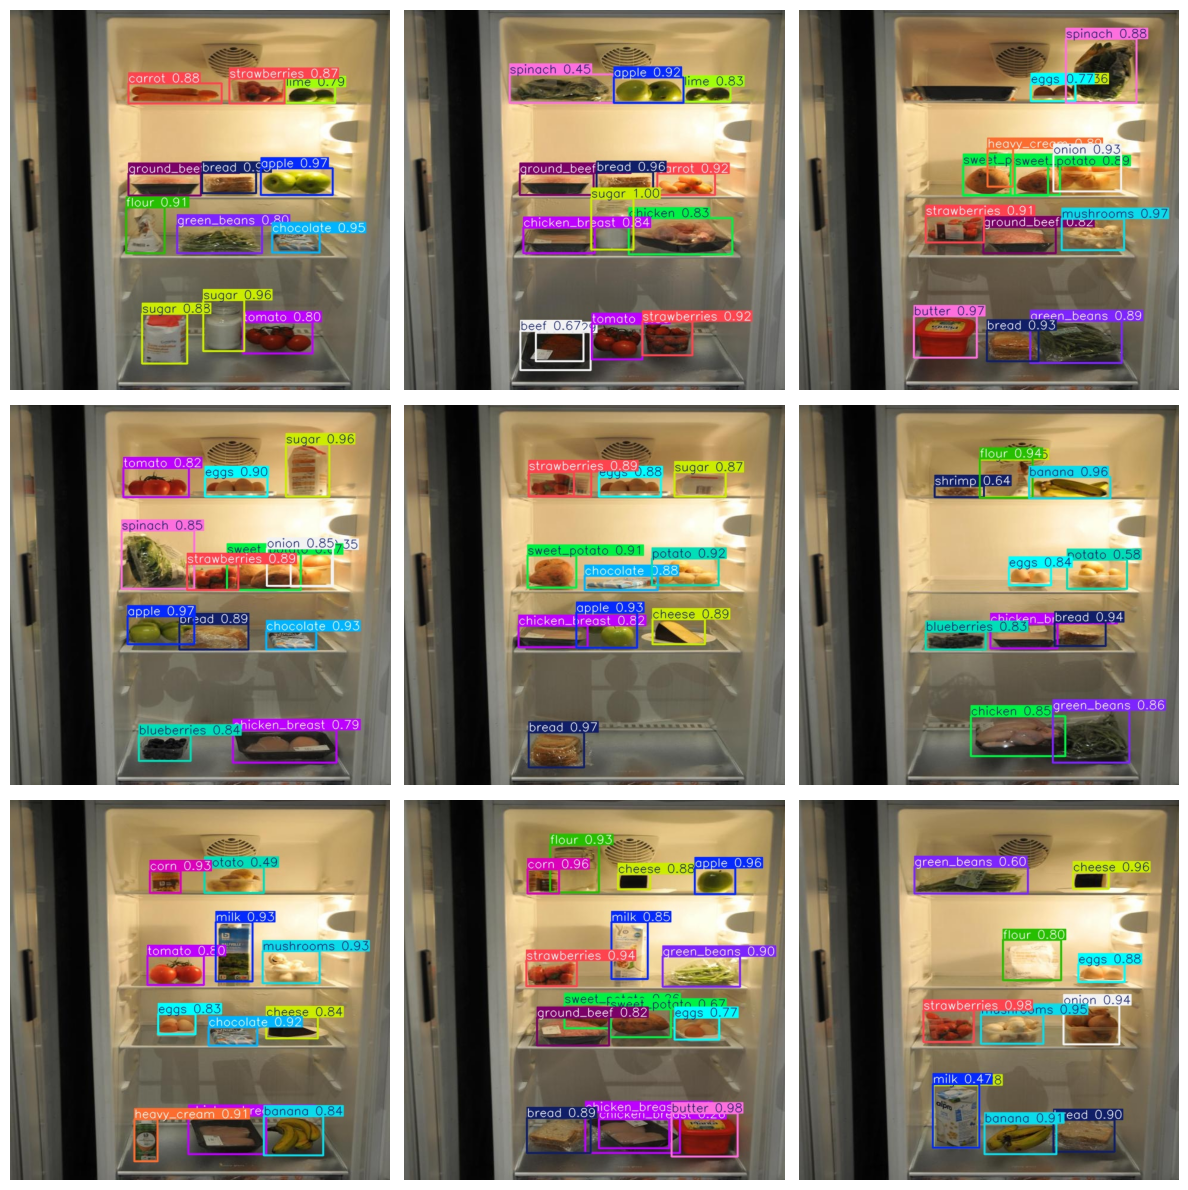

In [39]:
import matplotlib.pyplot as plt
import glob
from IPython.display import display, Image

# Set up the 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Get the first 9 images from the specified folder
image_paths = glob.glob(f'runs/detect/predict3/*.jpg')[:9]

# Display each image in the grid
for i, ax in enumerate(axes.flat):
    if i < len(image_paths):
        img = plt.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')  # Hide axes for a cleaner look
    else:
        ax.axis('off')  # Hide any extra subplots

# Show the 3x3 grid of images
plt.tight_layout()
plt.show()


----------
Copyright (C) 2025 Advanced Micro Devices, Inc. All rights reserved.

SPDX-License-Identifier: MIT